# check the resutls from RocketClassifier
Based on the data parameters from pre-training

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## Balanced Threshold Based Segment Data

FileNotFoundError: [Errno 2] No such file or directory: '/work/data/interim/time_series_classification/092717 OF SERT WT M32-n1/tsc_shuffle_SVM_threshold_segment_shuffling_train_rocket.pickle'

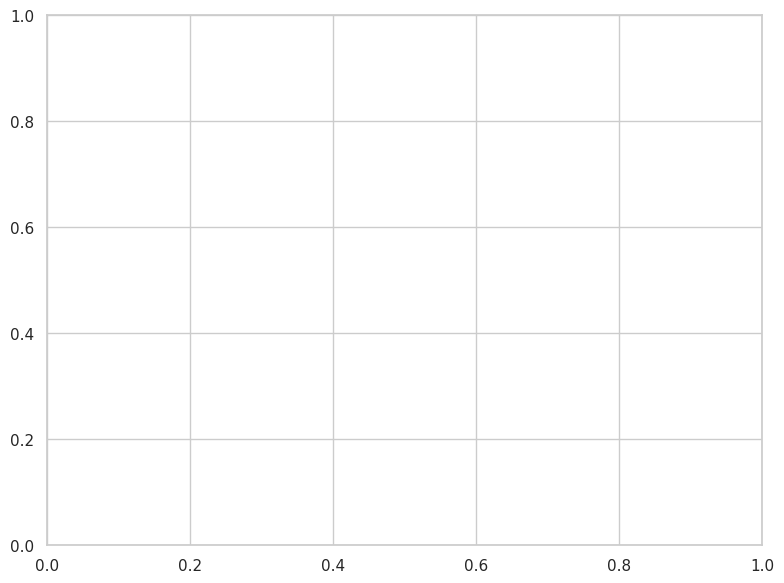

In [3]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout = True, sharey=True)
file_model = [
    # ("tsc_train_rocket_Ridge_threshold_segment_False", "Ridge Classification"),
    ("tsc_train_rocket_SVM_threshold_segment_False", "SVM Classification"),
    # ("tsc_train_rocket_Kmeans_threshold_segment_False", "KMeans"),
    # ("tsc_train_rocket_Softmax_threshold_segment_False", "Softmax"),
    # ("tsc_train_rocket_Ridge_threshold_segment_behavior shuffling", "Ridge Behavior Shuffle"),
    # ("tsc_train_rocket_Ridge_threshold_segment_events shuffling", "Ridge Events Shuffle"),
    # ("tsc_train_rocket_SVM_threshold_segment_behavior shuffling", "SVM Behavior Shuffle"),
    ("tsc_shuffle_SVM_threshold_segment_shuffling_train_rocket", "SVM Events Shuffle"),

]
accu_list = []
for file_name, model in file_model:
    for m_id, data_dir in enumerate(datalist):
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"{file_name}.pickle"),"rb") as f:
            results = pickle.load(f)
        accu = np.mean(results["scores"])
        if "KO" in data_name:
            accu_list.append((accu, "KO", model))
        else:
            accu_list.append((accu, "WT", model))

df = pd.DataFrame(accu_list, columns=["score", "mouse type", "model"])
sns.boxplot(x="mouse type", y ="score", hue="model", data=df, ax=ax)
ax.set_ylabel("accuracy")
# ax.legend(bbox_to_anchor=(.3, 1.2))
ax.set_title("Rocket Transform")


## Paired t-test

### Ridge

In [3]:
import scipy.stats as stats
file_model = [
    ("tsc_train_rocket_Ridge_threshold_segment_False", "original"),
    ("tsc_train_rocket_Ridge_threshold_segment_behavior shuffling", "shuffle"),
    # ("tsc_train_rocket_Ridge_threshold_segment_events shuffling", "shuffle"),
]
acc_WT, acc_KO = [], []
for m_id, data_dir in enumerate(datalist):
    for file_name, data_type in file_model:
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"{file_name}.pickle"),"rb") as f:
            results = pickle.load(f)
        if "KO" in str(data_dir):
            acc_KO.append(((np.mean(results["scores"])), data_type))
        else:
            acc_WT.append(((np.mean(results["scores"])), data_type))

            
df_acc_WT = pd.DataFrame(acc_WT, columns=["accu", "data type"])
WT_p = stats.ttest_rel(df_acc_WT[df_acc_WT["data type"]=="original"]["accu"].values,
                df_acc_WT[df_acc_WT["data type"]=="shuffle"]["accu"].values).pvalue
df_acc_KO = pd.DataFrame(acc_KO, columns=["accu", "data type"])
KO_p = stats.ttest_rel(df_acc_KO[df_acc_KO["data type"]=="original"]["accu"].values,
                df_acc_KO[df_acc_KO["data type"]=="shuffle"]["accu"].values).pvalue
print(f"WT: {WT_p: .2f}, KO: {KO_p: .2f}")


WT:  0.18, KO:  0.30


### SVM

In [4]:
import scipy.stats as stats
file_model = [
    ("tsc_train_rocket_SVM_threshold_segment_False", "original"),
    ("tsc_train_rocket_SVM_threshold_segment_behavior shuffling", "shuffle"),
    # ("tsc_train_rocket_SVM_threshold_segment_events shuffling", "shuffle"),
]
acc_WT, acc_KO = [], []
for m_id, data_dir in enumerate(datalist):
    for file_name, data_type in file_model:
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"{file_name}.pickle"),"rb") as f:
            results = pickle.load(f)
        if "KO" in str(data_dir):
            acc_KO.append(((np.mean(results["scores"])), data_type))
        else:
            acc_WT.append(((np.mean(results["scores"])), data_type))

            
df_acc_WT = pd.DataFrame(acc_WT, columns=["accu", "data type"])
WT_p = stats.ttest_rel(df_acc_WT[df_acc_WT["data type"]=="original"]["accu"].values,
                df_acc_WT[df_acc_WT["data type"]=="shuffle"]["accu"].values).pvalue
df_acc_KO = pd.DataFrame(acc_KO, columns=["accu", "data type"])
KO_p = stats.ttest_rel(df_acc_KO[df_acc_KO["data type"]=="original"]["accu"].values,
                df_acc_KO[df_acc_KO["data type"]=="shuffle"]["accu"].values).pvalue
print(f"WT: {WT_p: .2f}, KO: {KO_p: .2f}")


WT:  0.10, KO:  0.37
